Evaluation of models trained on 5 core of Amazon Books dataset with hyperparameters:
loss: warp
learning_schedule: ‘adadelta’
no_components: 100
Pushing out the clusters of categories were activated.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns
from tqdm.auto import tqdm

from utils import analyse_metrics, analyse_embeddings, reduce_item_embeddings

In [5]:
tqdm.pandas()
THREADS = 8

In [6]:
epochs = [5, 25, 50, 250, 500, 1000]
models = [pd.read_pickle(f'/pio/scratch/1/i313924/data/lightfm_data/model_{epochs}_epochs_all_clusters_books.pkl') for epochs in epochs]
train_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/books_interactions.npz')
test_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/books_test_interactions.npz')
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/books_dataset.pkl')

In [ ]:
abx_path = '/pio/scratch/1/recommender_systems/interim/ABX_tests/books.json'
categories = pd.read_parquet('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Books_categories.parquet')
categories.category_1 = categories.category_1.map(lambda s: s.replace('&amp;', '&'))

In [14]:
item_ids = list(dataset.mapping()[2].keys())

PCA prepared
EPOCH: 5
EPOCH: 25
EPOCH: 50
EPOCH: 250
EPOCH: 500
EPOCH: 1000


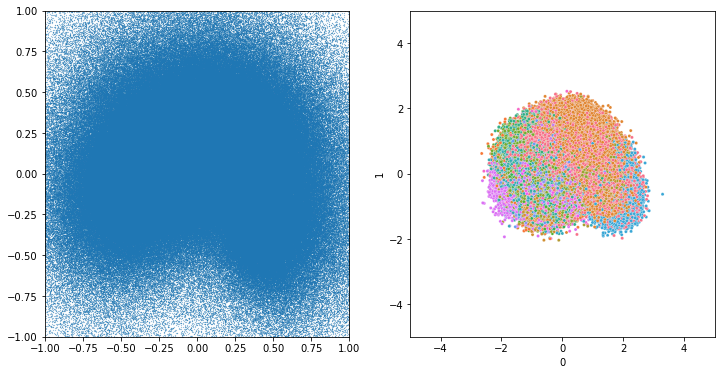

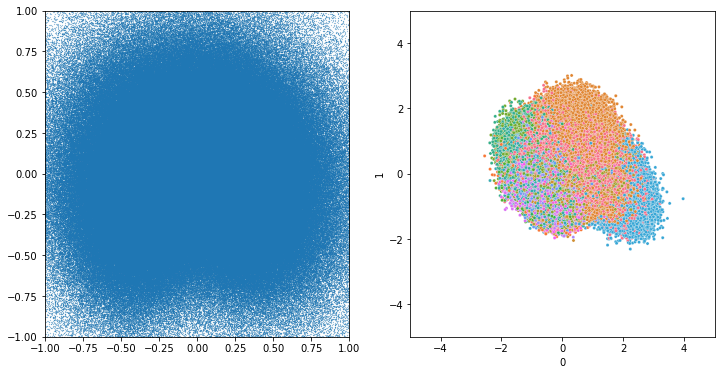

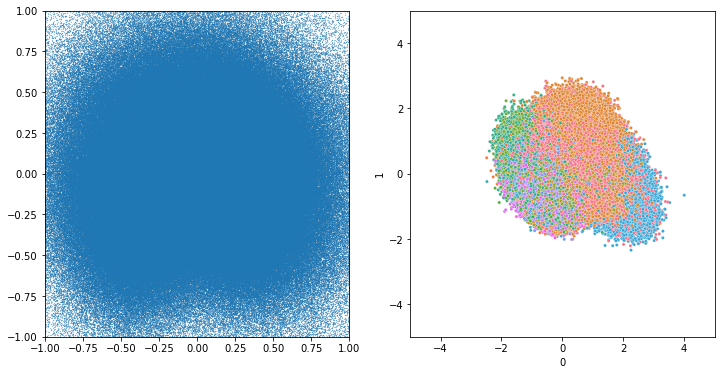

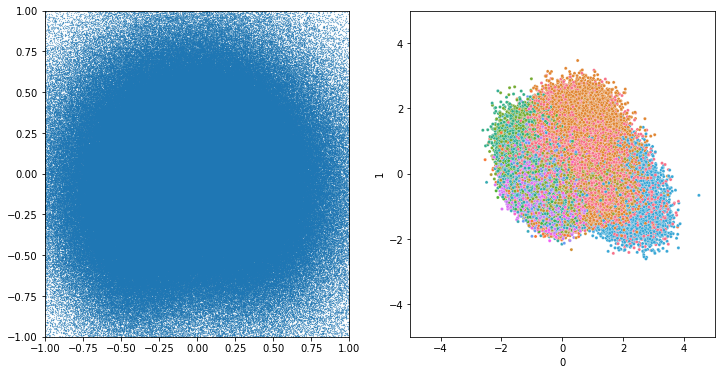

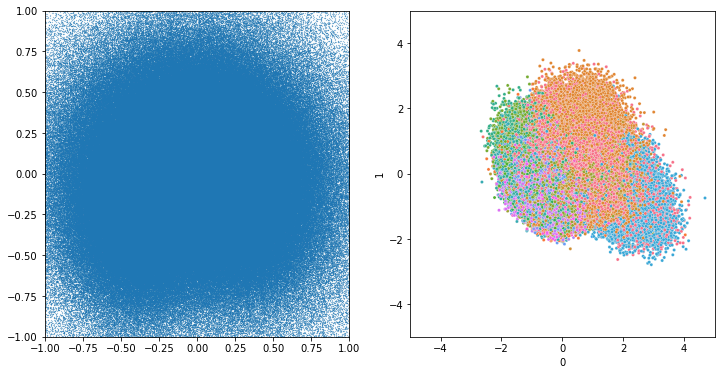

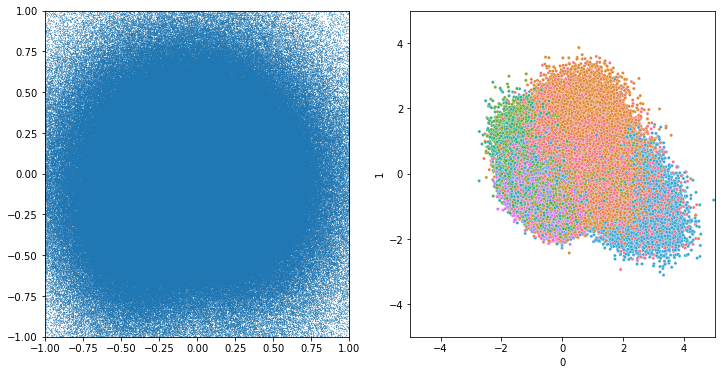

In [15]:
e, c, _, _, item_pca = analyse_embeddings(epochs, models, dataset, categories, abx_path)

Eucl dist


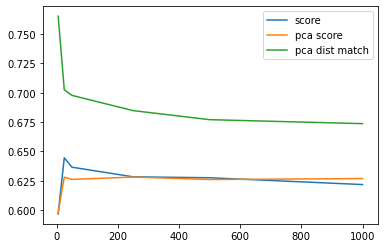

Cos dist


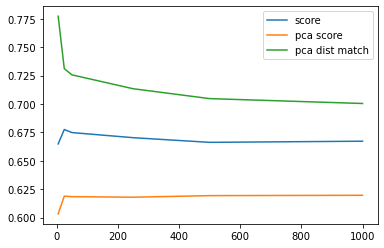

In [17]:
print("Eucl dist")
plt.plot(np.tile(epochs, (3, 1)).T, e)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()
print("Cos dist")
plt.plot(np.tile(epochs, (3, 1)).T, c)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()

In [18]:
e

[[0.5968, 0.598, 0.7652],
 [0.6446, 0.6281, 0.7025],
 [0.6366, 0.6262, 0.6978],
 [0.6284, 0.6282, 0.6848],
 [0.6276, 0.6261, 0.6771],
 [0.6218, 0.6269, 0.6737]]

In [19]:
c

[[0.6648, 0.6032, 0.7772],
 [0.6775, 0.6188, 0.7311],
 [0.6748, 0.6184, 0.7256],
 [0.6703, 0.6179, 0.7134],
 [0.6662, 0.6193, 0.7047],
 [0.6672, 0.6196, 0.7004]]

In [20]:
tqdm.pandas()
test_hit_rate_scores, test_recall_scores, test_precision_scores = analyse_metrics(models, train_interactions, test_interactions, dataset)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [21]:
test_recall_scores

[0.0899, 0.13317999999999997, 0.1471, 0.16564, 0.1683, 0.16702]

In [22]:
test_precision_scores

[0.00899,
 0.013318,
 0.014709999999999999,
 0.016564,
 0.01683,
 0.016701999999999998]

In [23]:
test_hit_rate_scores

[0.3352, 0.4487, 0.4796, 0.5096, 0.5122, 0.5125]

In [24]:
model = models[-1]
reduced_item_embeddings  = reduce_item_embeddings(model, dataset, categories)

In [25]:
reduced_item_embeddings.category_1.value_counts()

Literature & Fiction                          69564
Children's Books                              33830
Mystery, Thriller & Suspense                  30029
Romance                                       29460
Christian Books & Bibles                      29419
Science Fiction & Fantasy                     17177
Crafts, Hobbies & Home                        15074
Biographies & Memoirs                         12797
History                                       12408
Arts & Photography                            11883
Teen & Young Adult                            11064
Cookbooks, Food & Wine                         9836
Health, Fitness & Dieting                      8493
Business & Money                               8346
Religion & Spirituality                        8256
New, Used & Rental Textbooks                   8252
Politics & Social Sciences                     6518
Self-Help                                      5923
Humor & Entertainment                          5902
Comics & Gra

<AxesSubplot:xlabel='0', ylabel='1'>

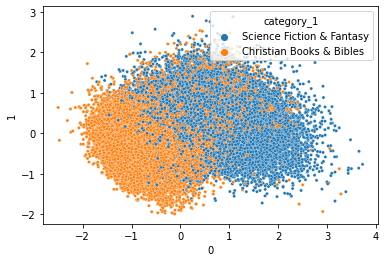

In [26]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Science Fiction & Fantasy', 'Christian Books & Bibles'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

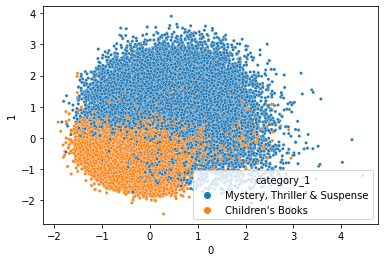

In [27]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(["Children's Books", 'Mystery, Thriller & Suspense'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

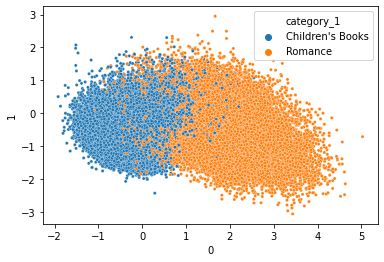

In [28]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(["Children's Books", 'Romance'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

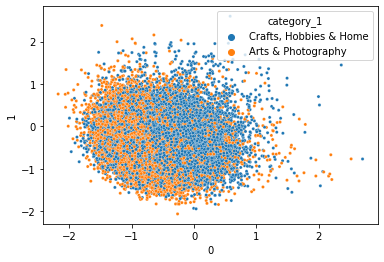

In [29]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Arts & Photography', 'Crafts, Hobbies & Home'])], hue='category_1', s=10, legend=True)